In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import lbg_forecast.lyalpha as ly
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
    photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
    spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)
spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

120


In [4]:
photometry.shape

(1200000, 6)

In [5]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
uparams.shape

(7414, 17)

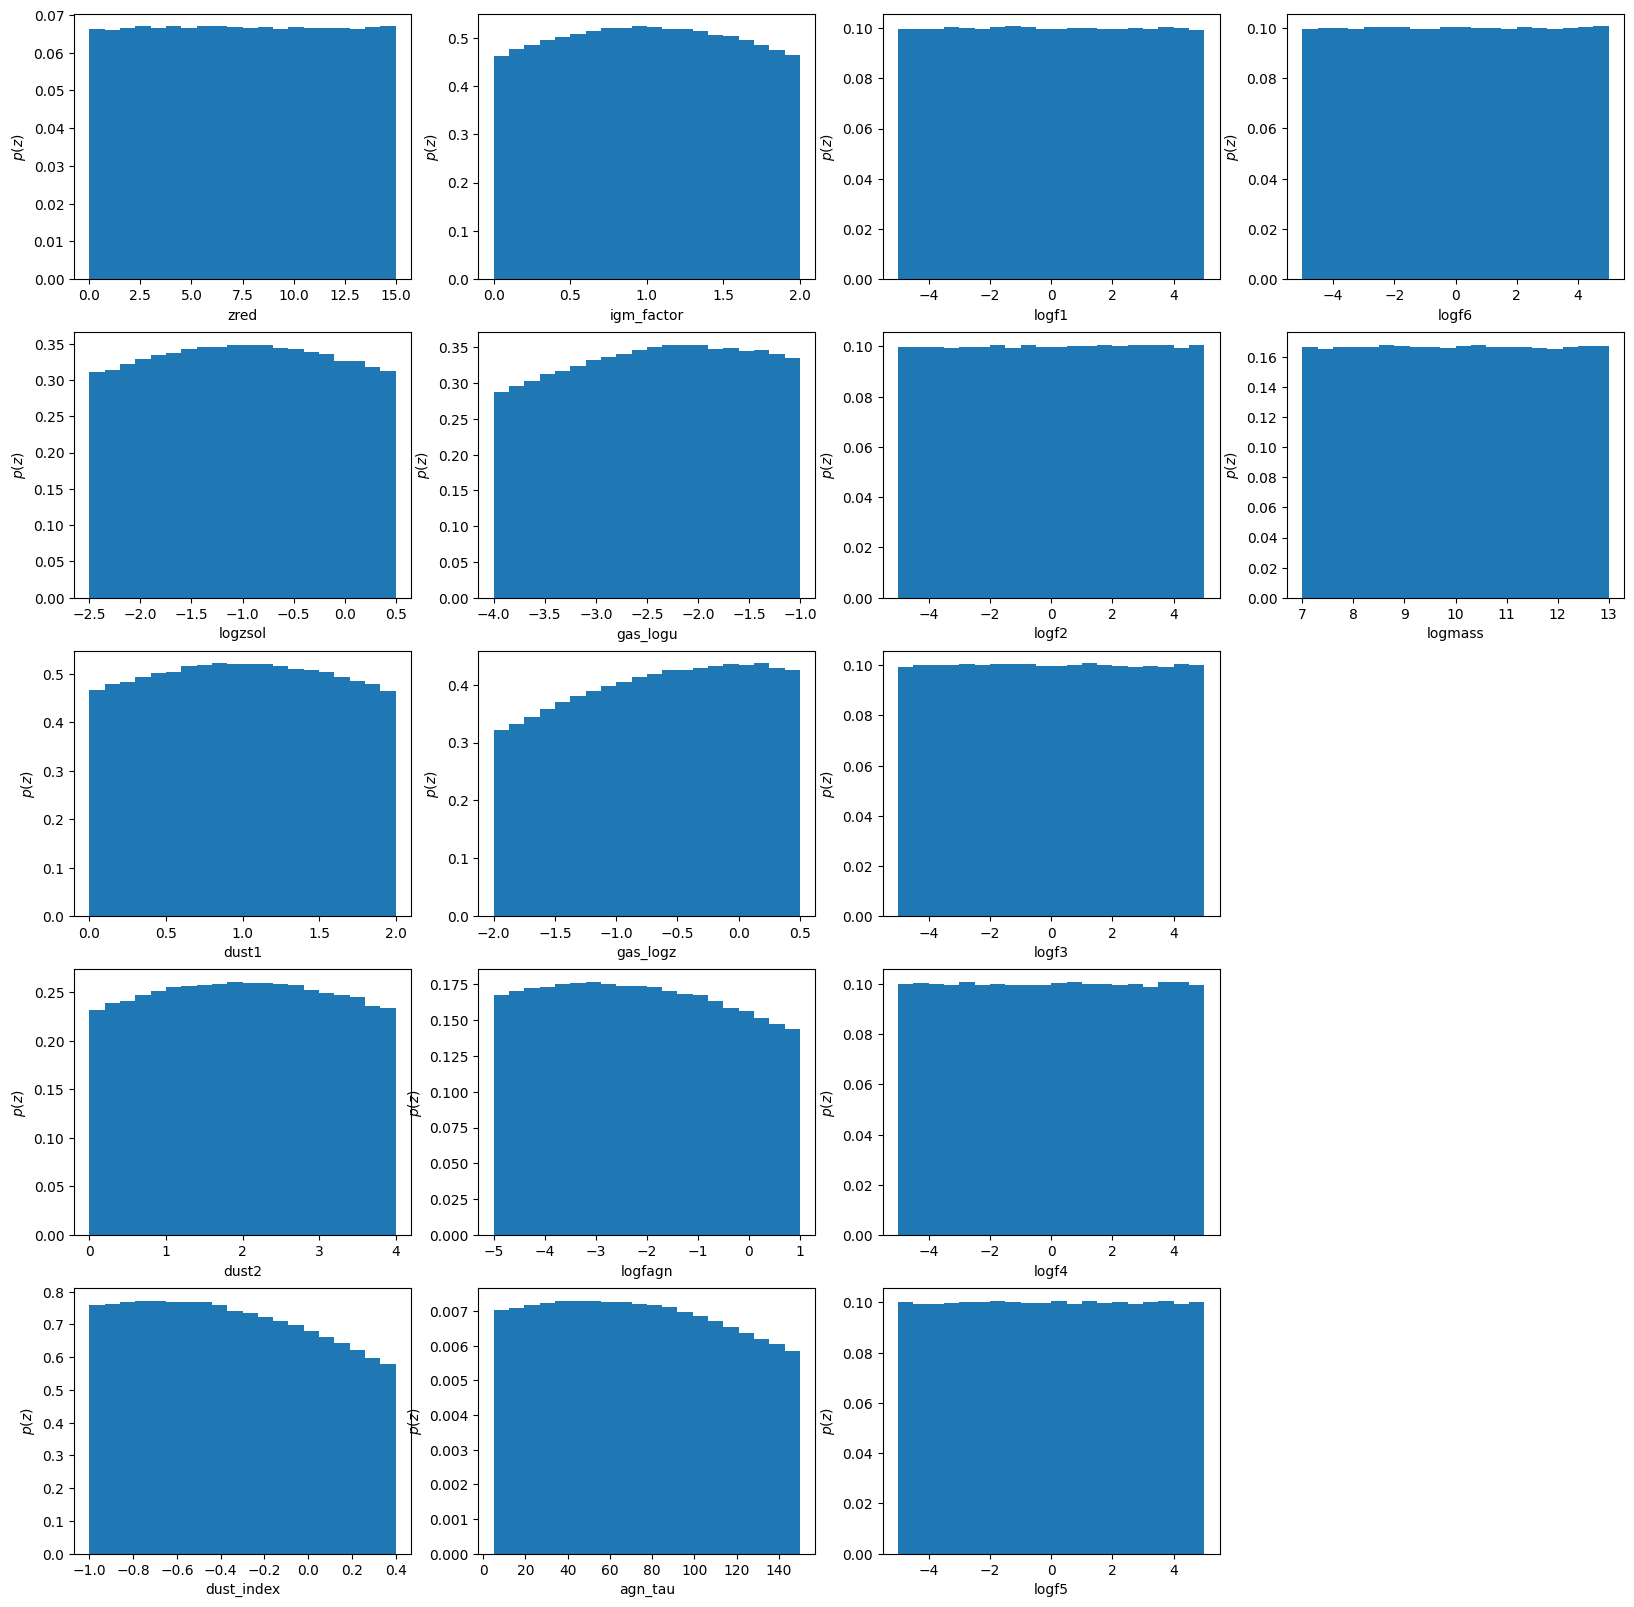

In [6]:
pop.plot_galaxy_population(sps_parameters)

(array([9.57448759e-03, 4.24013022e-02, 1.16261635e-02, 1.16261635e-02,
        5.47113576e-03, 2.05167591e-03, 2.73556788e-03, 3.00912467e-02,
        3.07751387e-02, 2.25684350e-02, 1.70972993e-02, 1.29939474e-02,
        5.40274657e-02, 3.54256041e-01, 8.50761611e-01, 9.24621944e-01,
        4.56155944e-01, 1.27887798e-01, 5.60791416e-02, 7.93314686e-02,
        1.40197854e-01, 1.68921317e-01, 9.71126598e-02, 4.78724379e-03,
        0.00000000e+00, 1.36778394e-03, 6.83891970e-04, 6.83891970e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.83891970e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.83891970e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.83891970e-04, 0.00000000e+00,
        0.00000000e+00, 1.36778394e-03]),
 array([ 0.34811575,  0.63226252,  0.91640928,  1.20055604,  1.48470281,
         1.76884957, 

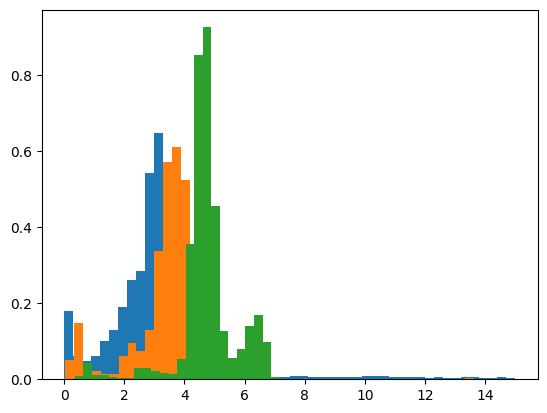

In [7]:
bins = 50
plt.hist(uparams[:, 0], bins=bins, density=True)
plt.hist(gparams[:, 0], bins=bins, density=True)
plt.hist(rparams[:, 0], bins=bins, density=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


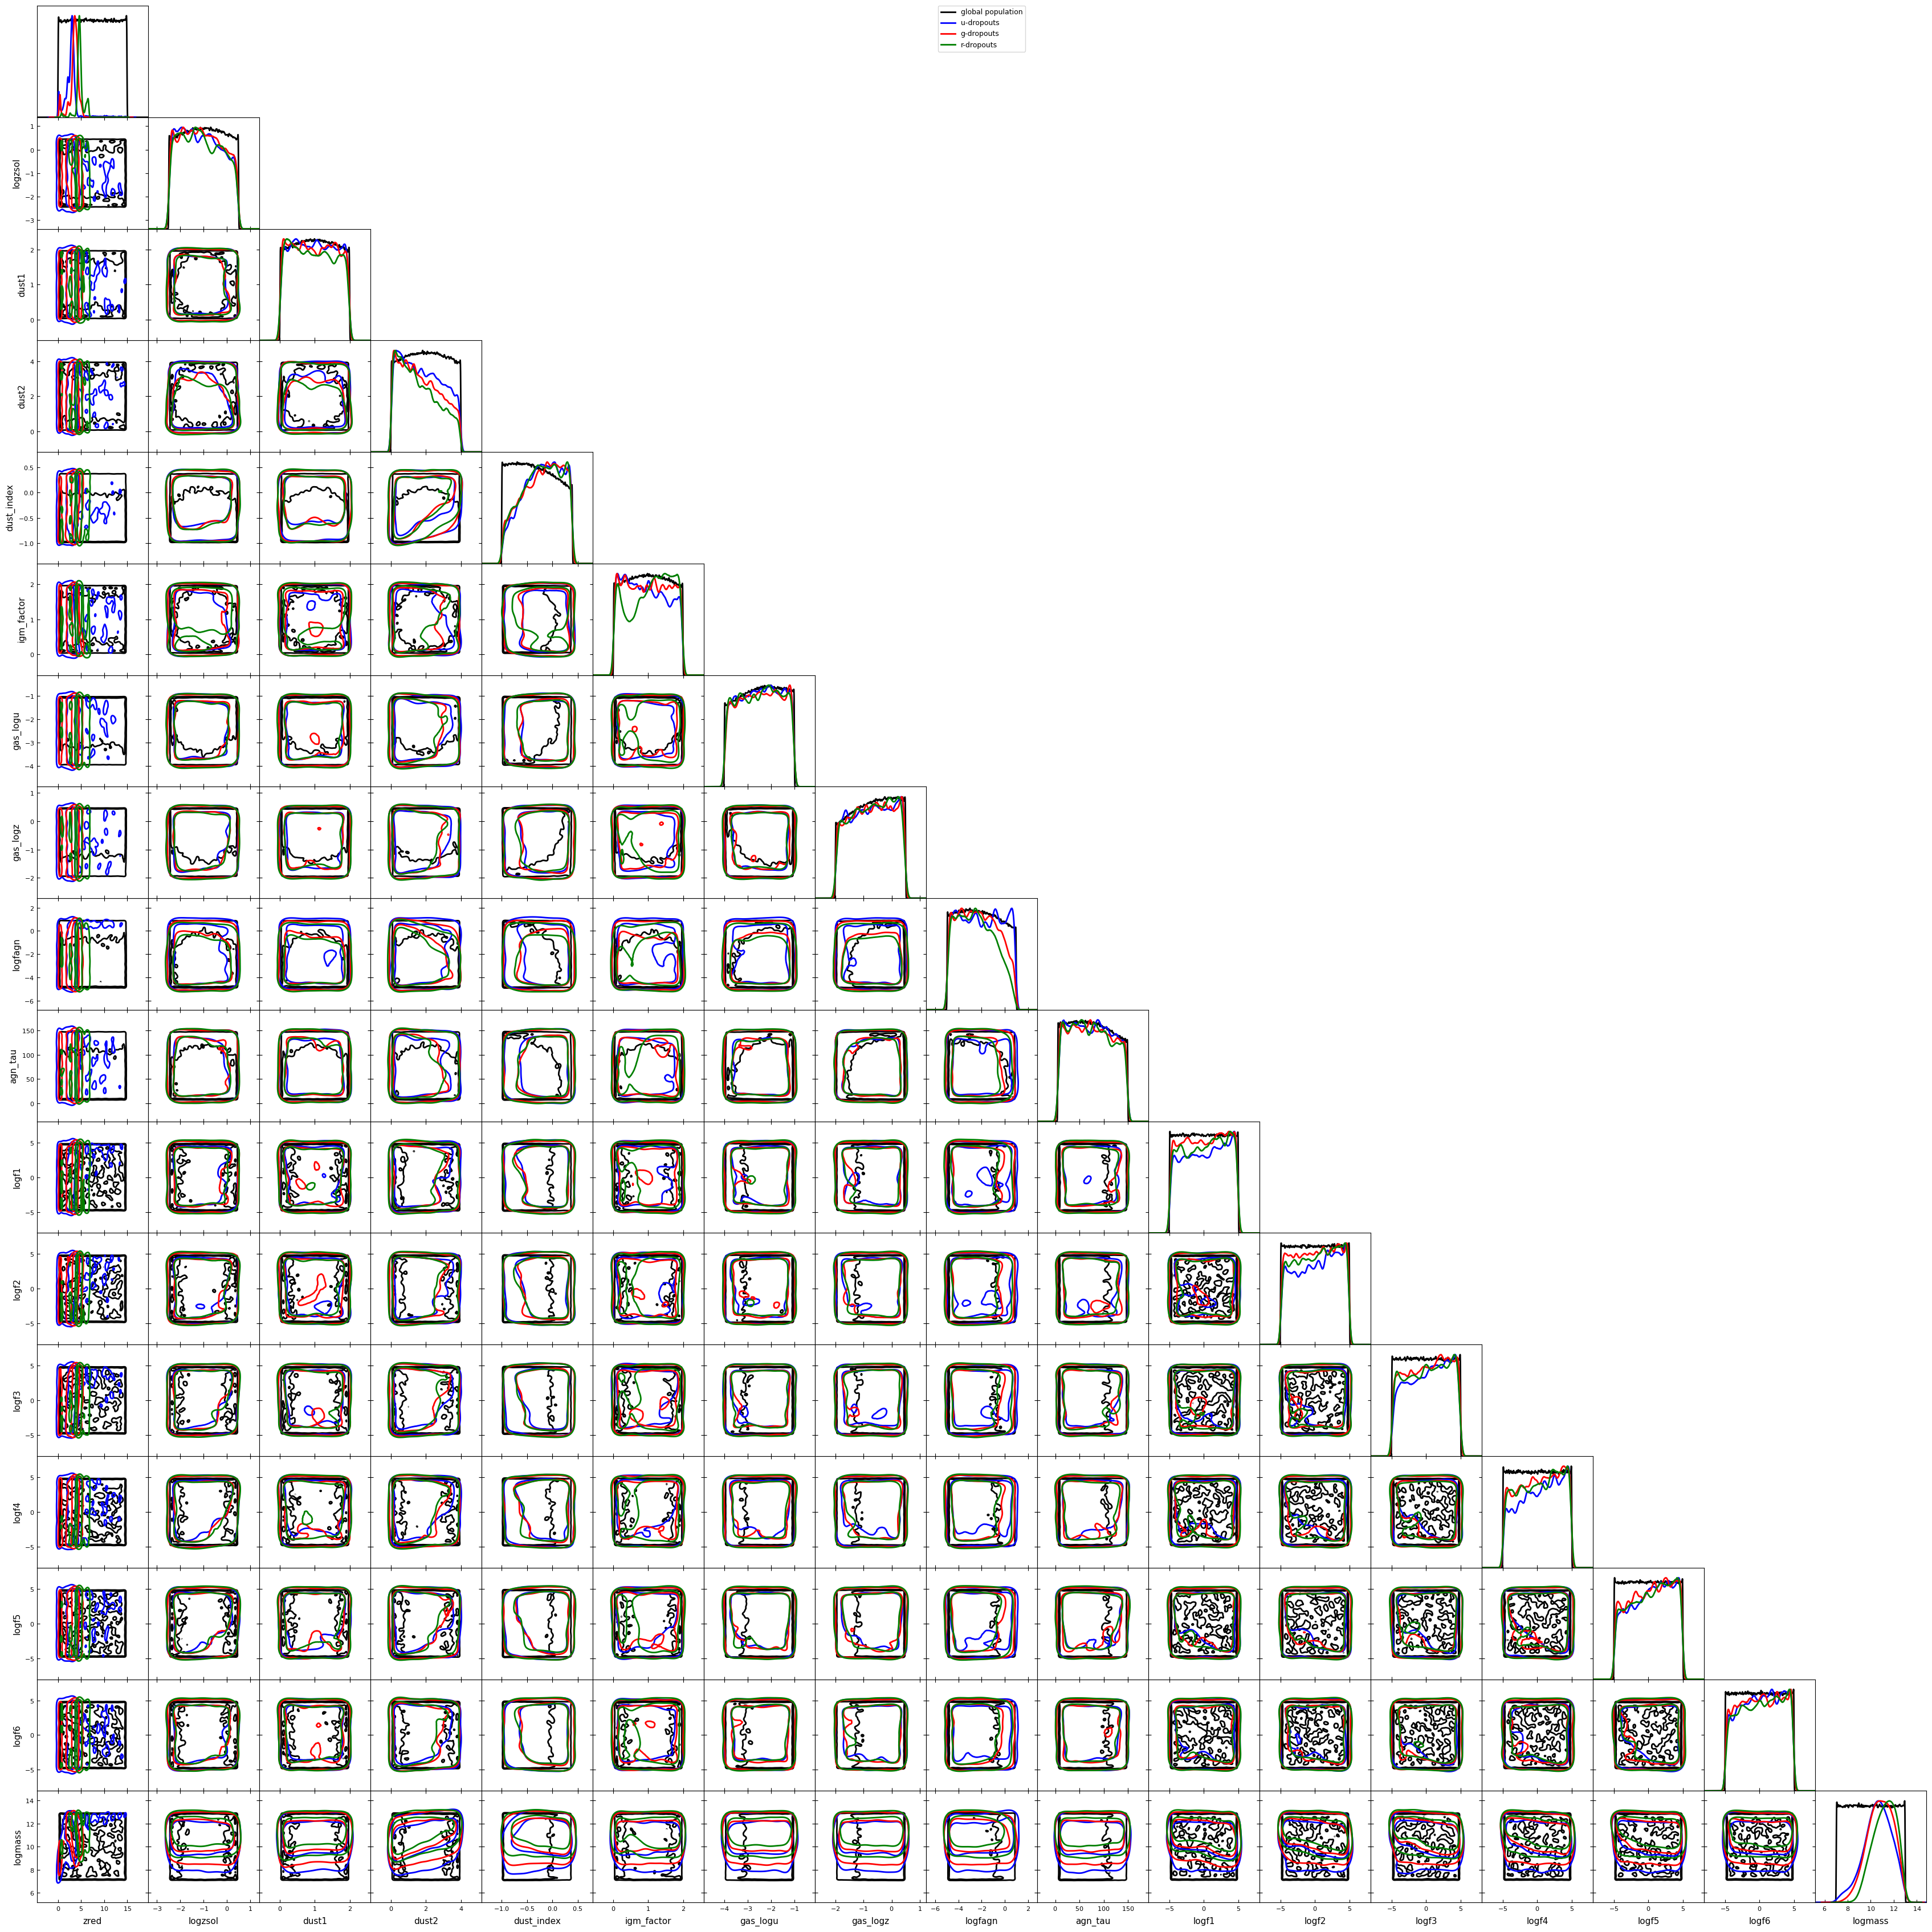

In [9]:
plot_samples(sps_parameters, uparams, gparams, rparams)